# ***INTRODUCTION***

In this Machine learning project, we will build different ML models and compare them to accurately detect the presence of Parkinson’s disease.

***Importing all necessary libararies***

In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





**Reading Dataset**

In [2]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Data Science Learning/Parkinson Disease/dataset/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


As we can see above, there are total of 24 columns in our dataset with 3 different data types:<br>
**name**: string <br>
**status**: categorical <br>
and rest are numerical data type(float)

In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


 It will still display some descriptive statistics.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

With **describe function** we will check the **count** and **data type** of each column given in the dataset

In [5]:
df.shape


(195, 24)

Our dataset contains **195 rows** and **24 columns**

**Data Visualisation**

In [6]:
df2 = df.drop('status', axis=1)

 We will drop the column **status** by using the **.drop() funtion** because it is a categorical column and we don't want to check it statistically.

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>,
        <Axes: title={'center': 'spread2'}>],
       [<Axes: title={'center': 'D2'}>, <Axes: 

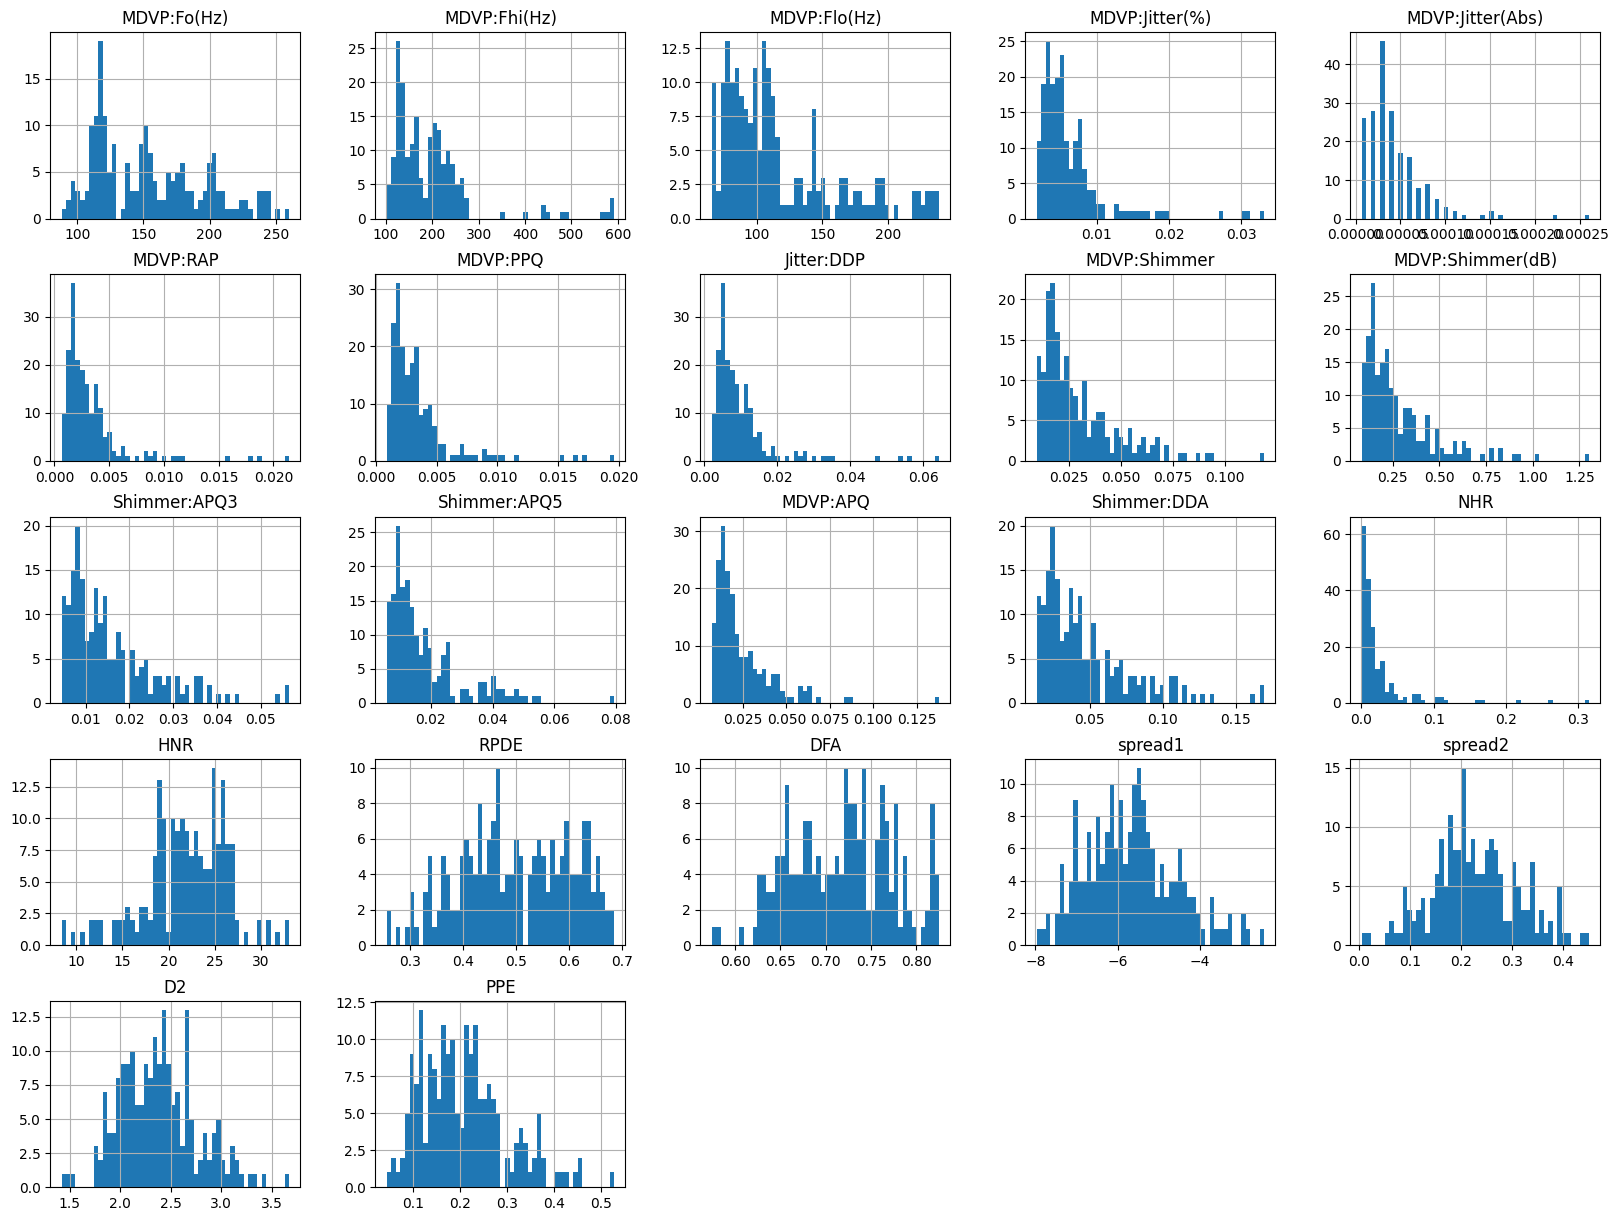

In [7]:
df2.hist(bins=50, figsize=(20,15))

**Plotting** the **distribution frequency** of variables.

<ipython-input-8-87398ef1fa19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cbar=True, linewidths = 0.25)


<Axes: >

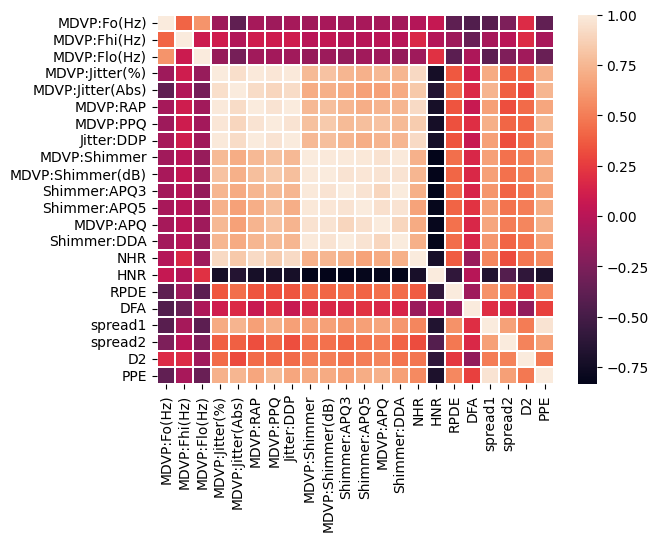

In [8]:
sns.heatmap(df2.corr(), cbar=True, linewidths = 0.25)

The above plot represents **correlation heatmap** between different variables

**Data Preprocessing**

In [9]:
def common_preprocessing(input_df):

  features=input_df.loc[:,input_df.columns!='status'].values[:,1:]
  labels=input_df.loc[:,'status'].values
  #print(labels[labels==1].shape[0], labels[labels==0].shape[0])
  scaler=MinMaxScaler((-1,1))
  x=scaler.fit_transform(features)
  y=labels
  x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)
  return x_train,x_test,y_train,y_test

In [10]:
from sklearn import metrics
def cm_plot(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

  cm_display.plot()
  plt.show()


Calling the common pre-processing function that we have defined above for training & testing splits

# ***Applying Algorithms***

### **SVM(Support Vector Machines)**

In [11]:
x_train,x_test,y_train,y_test = common_preprocessing(df)
classifi_svm = SVC()
classifi_svm.fit(x_train, y_train)
y_pred_svm = classifi_svm.predict(x_test)
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy Score of SVM:",accuracy_score_svm)

Accuracy Score of SVM: 87.17948717948718


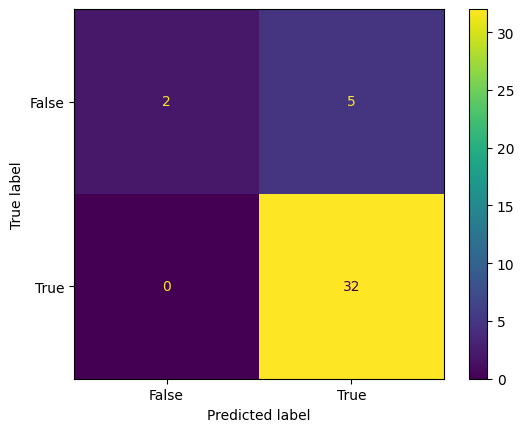

In [12]:
cm_plot(y_test, y_pred_svm)

Our very much first model i.e. SVM gives us 87.18% accuracy which is very good but let see if we can improve it further.

### ***KNN(K-Nearest Neighbor)***

In [13]:
x_train,x_test,y_train,y_test = common_preprocessing(df)
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
variance = pca.explained_variance_ratio_
classifi_knn = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifi_knn.fit(x_train, y_train)
y_pred_KNN = classifi_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, y_pred_KNN)*100
print("Accuracy Score of KNN:", accuracy_score_knn)

Accuracy Score of KNN: 89.74358974358975


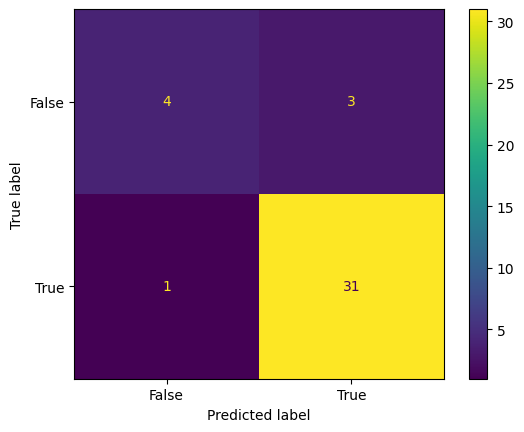

In [14]:
cm_plot(y_test, y_pred_KNN)

## ***Random Forest***

In [15]:
x_train,x_test,y_train,y_test = common_preprocessing(df)
classifi_rf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
classifi_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [16]:
y_pred_rf = classifi_rf.predict(x_test)
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy Score of Random Forest:", accuracy_score_rf)

Accuracy Score of Random Forest: 92.3076923076923


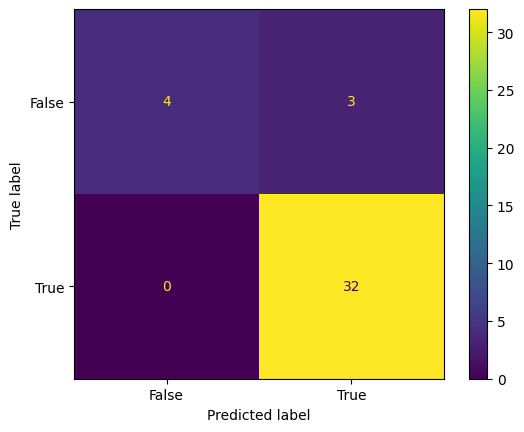

In [17]:
cm_plot(y_test, y_pred_rf)

## ***XGBoost(Extreme Gradient Boosting)***

In [18]:
x_train,x_test,y_train,y_test = common_preprocessing(df)
classifi_xgb=XGBClassifier()
classifi_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
y_pred_xgb=classifi_xgb.predict(x_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)*100
print("Accuracy Score of XGBoost:", accuracy_score_xgb)

Accuracy Score of XGBoost: 94.87179487179486


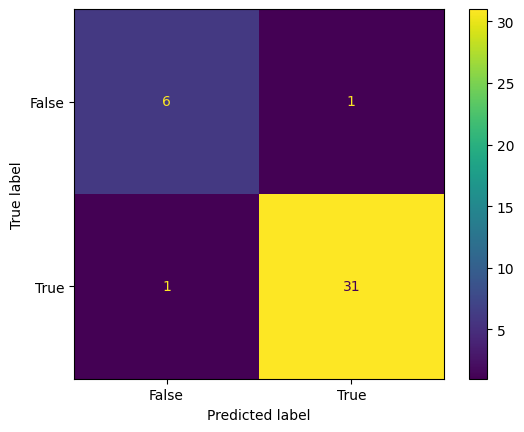

In [20]:
cm_plot(y_test, y_pred_xgb)

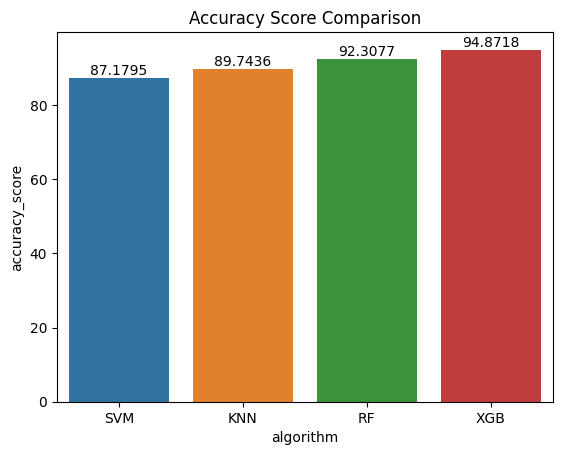

In [26]:
algorithm = ["SVM", "KNN", "RF", "XGB"]
accuracy_score = [accuracy_score_svm, accuracy_score_knn, accuracy_score_rf, accuracy_score_xgb]
temp_df = pd.DataFrame()
temp_df["algorithm"] = algorithm
temp_df["accuracy_score"] = accuracy_score
ax = sns.barplot(data=temp_df, x="algorithm", y="accuracy_score")
ax.set_title('Accuracy Score Comparison')
for i in ax.containers:
    ax.bar_label(i,)

# ***CONCLUSION***
After applying 4 different type of algorithms, we have found that for detecting the Parkinson's disease XGBoost have outperformed the rest 3 with highest accuracy score of ***94.87%***. <br>
There is still possibility to increase the accuracy score by tuning the parameters of algorithms.